# Decision Tree Lab

#### Libs

In [35]:
import pandas as pd

## 2. Monkdata

### Assignment 0
>Each one of the datasets has properties which makes
them hard to learn. Motivate which of the three problems is most
difficult for a decision tree algorithm to learn.

### Answer 0
Monk1: It can be difficult for the algorithm understand that `a1=a2`. They are identical while independant when evaluated. 

Monk2: Because of that the 6 attributes are computed independently. Realizing that exactly 2 `ai` must be 1 is a difficult task.

Monk3: The most simple problem, but can possible lead to unnecessary long tree structures becuase of the long AND and OR logic.

In [36]:
import monkdata as m
import dtree as dt

___

## 3. Entropy

### Assignment 1
>The file `dtree.py` defines a function entropy which
calculates the entropy of a dataset. Import this file along with the
monks datasets and use it to calculate the entropy of the training
datasets.

In [37]:
enp_1 = dt.entropy(m.monk1)

In [38]:
enp_2 = dt.entropy(m.monk2)

In [39]:
enp_3 = dt.entropy(m.monk3)

In [40]:
enp_data = {"Monk1": [enp_1], 
            "Monk2": [enp_2], 
            "Monk3": [enp_3]
           }
enp_df = pd.DataFrame(enp_data, index = ["Entropy"])

### Answer 1

In [41]:
enp_df

,Monk1,Monk2,Monk3
Entropy,1.0,0.957117,0.999806


### Assignment 2
>Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy.

### Answer 2
***Uniform Distribution:*** 
1. A coin-flip is a uniform distribution because it is both equally likely that the flip is head or tail
2. A toss of dice is a uniform distribution of the same reason
- A coin-flip has lower entropy than a dice-toss because the probability of an arbitrary outcome is higher, i.e there are fewer options and there for more predictable and lower entropy.

***Non-uniform distribution***
1. A non-uniform distribution could be a dice which are more likely (50%) to land on 6 than the other 1,2,3,4,5 (10%). This has actually lower entropy/more predictable than a normal dice. 

___

## 4. Information Gain

### Assignment 3
>Use the function `averageGain` (defined in `dtree.py`)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as in-
stances of the class Attribute (defined in `monkdata.py`) which you
can access via `m.attributes[0]`, ..., `m.attributes[5]`. Based on
the results, which attribute should be used for splitting the examples
at the root node?

In [42]:
info_gain = {"a1":[],"a2":[],"a3":[],"a4":[],"a5":[],"a6":[], }
monks = [m.monk1, m.monk2, m.monk3]


for i in range(6):
    attr_gain = list()
    for j in range(3):
        info= dt.averageGain(monks[j], m.attributes[i])
        info_gain["a"+str(i+1)].append(info)
        

In [43]:
info_gain_df = pd.DataFrame(info_gain, index = ["monk1", "monk2", "monk3"])

In [44]:
info_gain_df

,a1,a2,a3,a4,a5,a6
monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


### Answer 3
- Monk1: `a5`
- Monk2: `a5`
- Monk3: `a2`

### Assignment 4
>For splitting we choose the attribute that maximizes
the information gain, ***Eq.3***. Looking at ***Eq.3*** how does the entropy of
the subsets, ***Sk***, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.

### Answer 4 
- When the information gain is maximized, the entropy of Sk will decrease until 0 in theory, i.e a leaf. 
- By picking the attribute with the largest information gain which means reducing the uncertainty the most. Which in return means we can create subsets with a lower entropy than before. 

___

## 5. Building Decision Trees

### Assignment 5
> Build the full decision trees for all three Monk
datasets using `buildTree`. Then, use the function `check` to measure the performance of the decision tree on both the training and
test datasets.
For example to built a tree for `monk1`and compute the performance
on the test data you could use 
<br>
<br>
`
import monkdata as m
import dtree as d
t=d.buildTree(m.monk1, m.attributes);
print(d.check(t, m.monk1test))
`
<br>
<br>
Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.

In [45]:
errors = {"E_train":[],"E_test":[]}
monktests = [m.monk1test, m.monk2test, m.monk3test]

for i in range(len(monks)):
    errors["E_train"].append(0.0)

for i in range(3):
    t=dt.buildTree(monks[i], m.attributes);
    errors["E_test"].append(1-dt.check(t, monktests[i]))

In [46]:
errors_df = pd.DataFrame(errors, index = ["Monk1", "Monk2", "Monk3"])

### Answer 5

In [47]:
errors_df

,E_train,E_test
Monk1,0.0,0.171296
Monk2,0.0,0.307870
Monk3,0.0,0.055556


There is no error for E_train because of the compared sets are the same. E_test result suggest that Monk2 is more overfitted than Monk1 & Monk3. At the same time, the logic for the `True` values in ***Assignment 0*** can be assumed correct. As the Decision Tree's difficulty to find a good tree structure came in the order Monk2, Monk1 & Monk3 read from the errors.

In [1]:
import drawtree_qt5 as qt5
qt5.drawTree(t)

___

## 6. Pruning

### Assignment 6
Explain pruning from a bias variance trade-of perspective.

### Answer 6
Classification trees, i.e Decision Trees, are prone to overfit because of its high variance. To reduce the overfit, pruning is used which lower the variance but also increase the bias (because you can miss relevant nodes - information loss). 

### Partition

In [116]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


In [117]:
def prune(data, fraction, test):
    train, val = partition(data, fraction)
    new_tree = dt.buildTree(train, m.attributes);
    best_error = float("inf");
    while True:
            
        alternativeTrees = dt.allPruned(new_tree)
        min_error = float("inf");
        best_tree = float("inf")
        if len(alternativeTrees) == 1:
            break
        for i in range (1, len(alternativeTrees)):
            error = (1 - dt.check(alternativeTrees[i], val))
            if error < min_error:
                min_error = error
                best_tree = i
        if (min_error <= best_error):
            best_error = min_error
        else:
            break
        new_tree = alternativeTrees[best_tree]
    return 1 - dt.check(new_tree, test) 


In [118]:
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
monk_errors = {"monk1_0.3":[], "monk1_0.4":[], "monk1_0.5":[], "monk1_0.6":[], "monk1_0.7":[], "monk1_0.8":[],
             "monk3_0.3":[], "monk3_0.4":[], "monk3_0.5":[], "monk3_0.6":[], "monk3_0.7":[], "monk3_0.8":[]}
N = 1000
for i in range(len(fractions)):
    for _ in range (N):
            t=dt.buildTree(m.monk1, m.attributes)
            error = prune(m.monk1, fractions[i], m.monk1test)
            monk_errors["monk1_"+ str(fractions[i])].append(error)

            t=dt.buildTree(m.monk3, m.attributes)
            error = prune(m.monk3, fractions[i], m.monk3test)
            monk_errors["monk3_"+ str(fractions[i])].append(error)
            
    
    

### Assignment 7
Evaluate the effect pruning has on the test error for
the `monk1` and `monk3` datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
`fraction`. Plot the classifcation error on the test sets as a function
of the parameter `fraction` = {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.
Note that the split of the data is random. We therefore need to
compute the statistics over several runs of the split to be able to draw
any conclusions. Reasonable statistics includes mean and a measure
of the spread. Do remember to print axes labels, legends and data
points as you will not pass without them.

### Answer 7

In [119]:
import matplotlib.pyplot as plt

In [120]:
dfm_errors = pd.DataFrame(monk_errors)

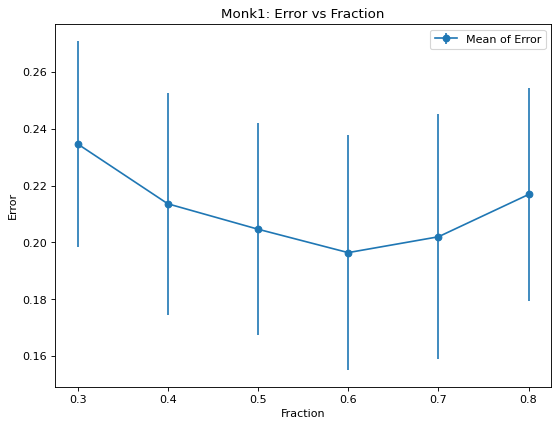

In [121]:
plt.figure(figsize=(8, 6), dpi = 80)
plt.errorbar(fractions, dfm_errors.mean()[:6], yerr = dfm_errors.std()[:6], fmt = "-o")
plt.title("Monk1: Error vs Fraction")
plt.legend(["Mean of Error"])
plt.xlabel("Fraction")
plt.ylabel("Error")
plt.show()

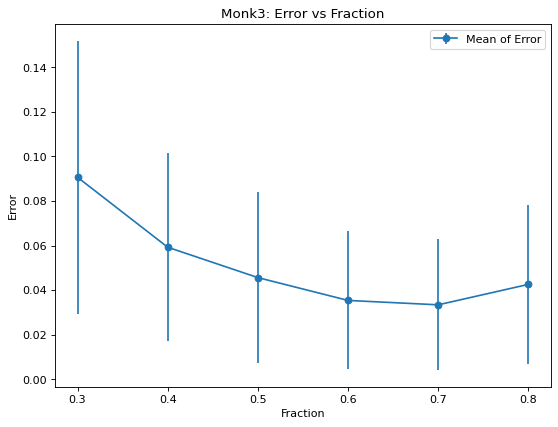

In [122]:
plt.figure(figsize=(8, 6), dpi = 80)
plt.errorbar(x = fractions, y = dfm_errors.mean()[6:], yerr = dfm_errors.std()[6:], fmt='-o')
plt.title("Monk3: Error vs Fraction")
plt.legend(["Mean of Error"])
plt.xlabel("Fraction")
plt.ylabel("Error")
plt.show()